# M3U1 Project - US Census Data
## Codecademy
## K. Tuba Turkcan Karaca

## Importing Necessary Packages<a class="anchor" id="import_package"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import glob
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

### Dealing with Multiple Files

We can combine the use of glob, a Python library for working with files, with pandas to organize this data better. glob can open multiple files by using regex matching to get the filenames:

In [2]:
states_files = glob.glob("states*.csv")
print(states_files)

df_list = []

for filename in states_files:
    df_list.append(pd.read_csv(filename))

us_census = pd.concat(df_list,ignore_index=True)

print(us_census.head())

print(len(us_census))
us_census.head()

['states6.csv', 'states5.csv', 'states7.csv', 'states3.csv', 'states8.csv', 'states9.csv', 'states0.csv', 'states2.csv', 'states1.csv', 'states4.csv']
   Unnamed: 0           State  TotalPop             Hispanic  \
0           0      New Jersey   8904413   18.74950049950049%   
1           1      New Mexico   2084117   45.28293172690762%   
2           2        New York  19673174  17.241424747786684%   
3           3  North Carolina   9845333   8.464762782128062%   
4           4    North Dakota    721640   2.832682926829267%   

                 White                Black                Native  \
0  56.488761238761285%  14.387862137862117%  0.11533466533466513%   
1   40.69799196787147%  1.7550200803212852%    9.248594377510045%   
2    56.4701050030883%  15.668046119003515%  0.32163887173152117%   
3    64.5976508521419%    21.3951174573929%   1.0854905573468434%   
4   87.44829268292683%  1.2843902439024397%    5.651219512195119%   

                 Asian                Pacific    

Unnamed: 0           State  TotalPop             Hispanic  \
0           0      New Jersey   8904413   18.74950049950049%   
1           1      New Mexico   2084117   45.28293172690762%   
2           2        New York  19673174  17.241424747786684%   
3           3  North Carolina   9845333   8.464762782128062%   
4           4    North Dakota    721640   2.832682926829267%   

                 White                Black                Native  \
0  56.488761238761285%  14.387862137862117%  0.11533466533466513%   
1   40.69799196787147%  1.7550200803212852%    9.248594377510045%   
2    56.4701050030883%  15.668046119003515%  0.32163887173152117%   
3    64.5976508521419%    21.3951174573929%   1.0854905573468434%   
4   87.44829268292683%  1.2843902439024397%    5.651219512195119%   

                 Asian                Pacific               Income  \
0   8.159990009990018%  0.031318681318681325%   $76581.08341708542   
1    1.23433734939759%   0.04277108433734938%   $47329.96787148595   
2  7.8971587399629355%  0.023450689726168417%   $64290.74911292006   
3   2.317457392906495%   0.05232611699677568%   $49937.46413697362   
4  0.9619512195121945%                    NaN  $58188.112195121954   

            GenderPop  
0   4343027M_4561386F  
1   1032414M_1051703F  
2  9541801M_10131373F  
3   4795408M_5049925F  
4     367963M_353677F

In [3]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


## Reshaping Data
We want: 

- Each variable as a separate column
- Each row as a separate observation

In [4]:
us_census = pd.melt(frame=us_census, id_vars=['State','TotalPop','Income','GenderPop'], value_vars=['Hispanic', 'White','Black','Native','Asian','Pacific'], value_name='Race_Percentage', var_name='Races')


In [5]:
#print(us_census.head(10))
print(us_census.columns)
print(us_census.Races.value_counts())
us_census.head(10)


Index(['State', 'TotalPop', 'Income', 'GenderPop', 'Races', 'Race_Percentage'], dtype='object')
White       60
Black       60
Hispanic    60
Pacific     60
Asian       60
Native      60
Name: Races, dtype: int64


State  TotalPop               Income           GenderPop  \
0      New Jersey   8904413   $76581.08341708542   4343027M_4561386F   
1      New Mexico   2084117   $47329.96787148595   1032414M_1051703F   
2        New York  19673174   $64290.74911292006  9541801M_10131373F   
3  North Carolina   9845333   $49937.46413697362   4795408M_5049925F   
4    North Dakota    721640  $58188.112195121954     367963M_353677F   
5            Ohio  11575977   $49655.24846625767   5662893M_5913084F   
6        Missouri   6045448   $49763.98772563177   2964003M_3081445F   
7         Montana   1014699  $47645.682835820895           510163M_F   
8        Nebraska   1869365  $55916.469696969696     929606M_939759F   
9          Nevada   2798636  $55526.525073746314   1407735M_1390901F   

      Races      Race_Percentage  
0  Hispanic   18.74950049950049%  
1  Hispanic   45.28293172690762%  
2  Hispanic  17.241424747786684%  
3  Hispanic   8.464762782128062%  
4  Hispanic   2.832682926829267%  
5  Hispanic  3.6720843250595037%  
6  Hispanic   4.037247838616718%  
7  Hispanic  3.2688888888888896%  
8  Hispanic   9.203759398496235%  
9  Hispanic  27.100883652430046%

In [6]:
us_census.describe()

TotalPop
count  3.600000e+02
mean   6.238516e+06
std    6.542446e+06
min    6.266040e+05
25%    2.030429e+06
50%    4.701414e+06
75%    7.303256e+06
max    3.842146e+07

In [7]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            360 non-null    object
 1   TotalPop         360 non-null    int64 
 2   Income           360 non-null    object
 3   GenderPop        360 non-null    object
 4   Races            360 non-null    object
 5   Race_Percentage  355 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.0+ KB


In [8]:
us_census.State.value_counts()

Colorado                12
New Jersey              12
Missouri                12
Georgia                 12
Rhode Island            12
Ohio                    12
Utah                    12
Maryland                12
Iowa                    12
District of Columbia     6
Illinois                 6
Minnesota                6
Massachusetts            6
Maine                    6
New York                 6
Wisconsin                6
New Hampshire            6
Indiana                  6
Washington               6
Mississippi              6
South Carolina           6
Pennsylvania             6
Puerto Rico              6
Montana                  6
North Dakota             6
Arkansas                 6
Virginia                 6
Tennessee                6
Kentucky                 6
Connecticut              6
South Dakota             6
Alabama                  6
Oregon                   6
Michigan                 6
Idaho                    6
Florida                  6
Nebraska                 6
H

In [9]:
# counts the number of missing values in each column 
us_census.isna().sum() 

State              0
TotalPop           0
Income             0
GenderPop          0
Races              0
Race_Percentage    5
dtype: int64

## Dealing with Duplicates

We use the .duplicated() function on the us_census DataFrame to make a Series object called duplicates.


In [10]:
duplicates = us_census.duplicated()
print(duplicates.value_counts())
duplicates.head()

False    306
True      54
dtype: int64


0    False
1    False
2    False
3    False
4    False
dtype: bool

Then, we use the pandas .drop_duplicates() function to remove all rows that are duplicates of another row.

In [11]:
us_census = us_census.drop_duplicates()
duplicates = us_census.duplicated()
print(duplicates.value_counts())  #no duplicates now
duplicates.head()

False    306
dtype: int64


0    False
1    False
2    False
3    False
4    False
dtype: bool

## GenderPop column
The column GenderPop sounds like it contains both gender and population!

In [12]:
print(us_census.columns)
us_census.GenderPop.head()


Index(['State', 'TotalPop', 'Income', 'GenderPop', 'Races', 'Race_Percentage'], dtype='object')


0     4343027M_4561386F
1     1032414M_1051703F
2    9541801M_10131373F
3     4795408M_5049925F
4       367963M_353677F
Name: GenderPop, dtype: object

We want to separate this data out into two new columns, male population and female population.

In [13]:
gender_split = us_census.GenderPop.str.split("_")

us_census['Male_Pop'] = gender_split.str.get(0)
us_census['Female_Pop'] = gender_split.str.get(1)

us_census = us_census.drop('GenderPop', axis=1)

us_census.head()

State  TotalPop               Income     Races  \
0      New Jersey   8904413   $76581.08341708542  Hispanic   
1      New Mexico   2084117   $47329.96787148595  Hispanic   
2        New York  19673174   $64290.74911292006  Hispanic   
3  North Carolina   9845333   $49937.46413697362  Hispanic   
4    North Dakota    721640  $58188.112195121954  Hispanic   

       Race_Percentage  Male_Pop Female_Pop  
0   18.74950049950049%  4343027M   4561386F  
1   45.28293172690762%  1032414M   1051703F  
2  17.241424747786684%  9541801M  10131373F  
3   8.464762782128062%  4795408M   5049925F  
4   2.832682926829267%   367963M    353677F

There is still an M or an F character in each entry! We should remove those first. 

In [14]:
us_census.Male_Pop = us_census.Male_Pop.str.rstrip("M")
us_census.Female_Pop = us_census.Female_Pop.str.rstrip("F")

In [15]:
us_census.Male_Pop.head()

0    4343027
1    1032414
2    9541801
3    4795408
4     367963
Name: Male_Pop, dtype: object

In [16]:
us_census.Female_Pop.head()

0     4561386
1     1051703
2    10131373
3     5049925
4      353677
Name: Female_Pop, dtype: object

In [17]:
us_census.head()

State  TotalPop               Income     Races  \
0      New Jersey   8904413   $76581.08341708542  Hispanic   
1      New Mexico   2084117   $47329.96787148595  Hispanic   
2        New York  19673174   $64290.74911292006  Hispanic   
3  North Carolina   9845333   $49937.46413697362  Hispanic   
4    North Dakota    721640  $58188.112195121954  Hispanic   

       Race_Percentage Male_Pop Female_Pop  
0   18.74950049950049%  4343027    4561386  
1   45.28293172690762%  1032414    1051703  
2  17.241424747786684%  9541801   10131373  
3   8.464762782128062%  4795408    5049925  
4   2.832682926829267%   367963     353677

## Income column


In [18]:
us_census.Income = us_census['Income'].replace('[\$]', '', regex=True)  
us_census.Income = pd.to_numeric(us_census['Income'])

print(us_census.Income)
print(us_census.Income[0])
us_census.Income.mean()

0      76581.083417
1      47329.967871
2      64290.749113
3      49937.464137
4      58188.112195
           ...     
352    50690.194987
355    72838.936726
356    51201.830037
357    62820.833959
358    38909.919207
Name: Income, Length: 306, dtype: float64
76581.08341708542


55922.667862224145

## Race_Percentage column

In [19]:
us_census.Race_Percentage = us_census['Race_Percentage'].replace('[\%]', '', regex=True)  
us_census.Race_Percentage = pd.to_numeric(us_census['Race_Percentage'])

us_census.Race_Percentage.mean()

16.436382445283204

In [20]:
us_census.State.value_counts()

Minnesota               6
New Hampshire           6
South Dakota            6
South Carolina          6
Kentucky                6
Wisconsin               6
New York                6
Maine                   6
Massachusetts           6
Iowa                    6
District of Columbia    6
Illinois                6
Washington              6
Nevada                  6
Mississippi             6
Indiana                 6
Pennsylvania            6
Puerto Rico             6
Montana                 6
North Dakota            6
Arkansas                6
Virginia                6
Georgia                 6
Tennessee               6
Oklahoma                6
Connecticut             6
Louisiana               6
Vermont                 6
Oregon                  6
Missouri                6
Michigan                6
Idaho                   6
Florida                 6
Ohio                    6
Colorado                6
Nebraska                6
Hawaii                  6
North Carolina          6
Rhode Island

## Looking at Types

In [21]:
print(us_census.dtypes)

State               object
TotalPop             int64
Income             float64
Races               object
Race_Percentage    float64
Male_Pop            object
Female_Pop          object
dtype: object


We need to convert Male_Pop and Female_Pop to int

## Missing Values

<AxesSubplot:>

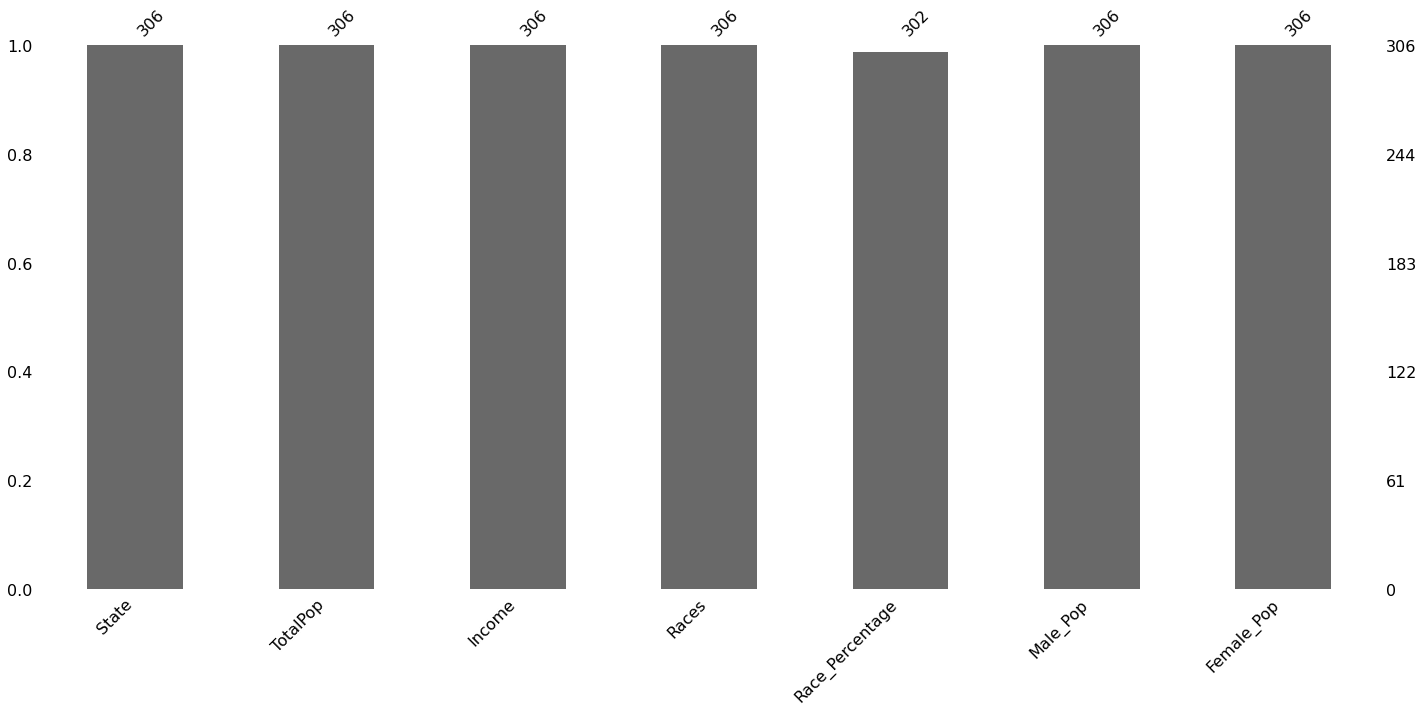

In [22]:
msno.bar(us_census)

In [23]:
us_census.Male_Pop=us_census.Male_Pop.str.strip()
us_census.Female_Pop=us_census.Female_Pop.str.strip()

In [24]:
us_census.Male_Pop.isna().value_counts()

False    306
Name: Male_Pop, dtype: int64

In [25]:
us_census.Female_Pop.isna().value_counts()

False    306
Name: Female_Pop, dtype: int64

In [26]:
us_census.Female_Pop = pd.to_numeric(us_census['Female_Pop'])

In [27]:
state_female_mean = us_census.groupby('State').Female_Pop.mean().reset_index()
state_female_mean = pd.DataFrame(state_female_mean)
state_female_mean

State  Female_Pop
0                Alabama   2489527.0
1                 Alaska    349215.0
2                Arizona   3342840.0
3               Arkansas   1506295.0
4             California  19334329.0
5               Colorado   2630239.0
6            Connecticut   1841615.0
7               Delaware    478041.0
8   District of Columbia    340810.0
9                Florida  10045763.0
10               Georgia   5123362.0
11                Hawaii    696428.0
12                 Idaho    806083.0
13              Illinois   6556862.0
14               Indiana   3333382.0
15                  Iowa   1558931.0
16                Kansas   1453125.0
17              Kentucky   2233145.0
18             Louisiana   2364097.0
19                 Maine    679019.0
20              Maryland         NaN
21         Massachusetts   3455936.0
22              Michigan   5038598.0
23             Minnesota   2727005.0
24           Mississippi   1536358.0
25              Missouri   3081445.0
26               Montana         NaN
27              Nebraska    939759.0
28                Nevada   1390901.0
29         New Hampshire    670717.0
30            New Jersey   4561386.0
31            New Mexico   1051703.0
32              New York  10131373.0
33        North Carolina   5049925.0
34          North Dakota    353677.0
35                  Ohio   5913084.0
36              Oklahoma   1942789.0
37                Oregon   1990780.0
38          Pennsylvania   6534215.0
39           Puerto Rico   1869213.0
40          Rhode Island    543273.0
41        South Carolina   2455167.0
42          South Dakota    419713.0
43             Tennessee   3331859.0
44                 Texas  13367298.0
45                  Utah   1444150.0
46               Vermont    318031.0
47              Virginia   4195682.0
48            Washington   3497739.0
49         West Virginia    937789.0
50             Wisconsin   2890732.0

In [28]:
state_female_mean=state_female_mean.dropna()

In [29]:
us_census.Female_Pop = us_census.Female_Pop.fillna(method = 'ffill')
us_census.groupby('State').Female_Pop.min()

State
Alabama                  2489527.0
Alaska                    349215.0
Arizona                  3342840.0
Arkansas                 1506295.0
California              19334329.0
Colorado                 2630239.0
Connecticut              1841615.0
Delaware                  478041.0
District of Columbia      340810.0
Florida                 10045763.0
Georgia                  5123362.0
Hawaii                    696428.0
Idaho                     806083.0
Illinois                 6556862.0
Indiana                  3333382.0
Iowa                     1558931.0
Kansas                   1453125.0
Kentucky                 2233145.0
Louisiana                2364097.0
Maine                     679019.0
Maryland                  679019.0
Massachusetts            3455936.0
Michigan                 5038598.0
Minnesota                2727005.0
Mississippi              1536358.0
Missouri                 3081445.0
Montana                  3081445.0
Nebraska                  939759.0
Nevada        

In [30]:
state_Male_mean = us_census.groupby('State').Male_Pop.mean()
state_Male_mean = pd.DataFrame(state_Male_mean)
state_Male_mean

DataError: No numeric types to aggregate

In [32]:
us_census = us_census.astype({"Male_Pop":int,"Female_Pop":int }) #"Male_Pop":int,  "Female_Pop":int
us_census.dtypes

State               object
TotalPop             int64
Income             float64
Races               object
Race_Percentage    float64
Male_Pop             int64
Female_Pop           int64
dtype: object

## State column

In [33]:
us_census.State.value_counts()

Minnesota               6
New Hampshire           6
South Dakota            6
South Carolina          6
Kentucky                6
Wisconsin               6
New York                6
Maine                   6
Massachusetts           6
Iowa                    6
District of Columbia    6
Illinois                6
Washington              6
Nevada                  6
Mississippi             6
Indiana                 6
Pennsylvania            6
Puerto Rico             6
Montana                 6
North Dakota            6
Arkansas                6
Virginia                6
Georgia                 6
Tennessee               6
Oklahoma                6
Connecticut             6
Louisiana               6
Vermont                 6
Oregon                  6
Missouri                6
Michigan                6
Idaho                   6
Florida                 6
Ohio                    6
Colorado                6
Nebraska                6
Hawaii                  6
North Carolina          6
Rhode Island

In [36]:
us_census.columns

Index(['State', 'TotalPop', 'Income', 'Races', 'Race_Percentage', 'Male_Pop',
       'Female_Pop'],
      dtype='object')

In [38]:
us_census=us_census.groupby(['State','Races']).sum().reset_index()
us_census

State     Races  TotalPop        Income  Race_Percentage  Male_Pop  \
0      Alabama     Asian   4830620  43296.358603         1.050255   2341093   
1      Alabama     Black   4830620  43296.358603        31.252976   2341093   
2      Alabama  Hispanic   4830620  43296.358603         3.751616   2341093   
3      Alabama    Native   4830620  43296.358603         0.453231   2341093   
4      Alabama   Pacific   4830620  43296.358603         0.034354   2341093   
..         ...       ...       ...           ...              ...       ...   
301  Wisconsin     Black   5742117  53898.889209         8.195187   2851385   
302  Wisconsin  Hispanic   5742117  53898.889209         6.683333   2851385   
303  Wisconsin    Native   5742117  53898.889209         0.953664   2851385   
304  Wisconsin   Pacific   5742117  53898.889209         0.020833   2851385   
305  Wisconsin     White   5742117  53898.889209        79.864009   2851385   

     Female_Pop  
0       2489527  
1       2489527  
2       2489527  
3       2489527  
4       2489527  
..          ...  
301     2890732  
302     2890732  
303     2890732  
304     2890732  
305     2890732  

[306 rows x 7 columns]

In [39]:
us_census.State.value_counts()

Minnesota               6
New Hampshire           6
South Dakota            6
South Carolina          6
Kentucky                6
Wisconsin               6
New York                6
Maine                   6
Massachusetts           6
Iowa                    6
District of Columbia    6
Illinois                6
Washington              6
Nevada                  6
Mississippi             6
Indiana                 6
Pennsylvania            6
Arizona                 6
Missouri                6
Montana                 6
North Dakota            6
Virginia                6
Georgia                 6
Tennessee               6
Oklahoma                6
Connecticut             6
Ohio                    6
North Carolina          6
Louisiana               6
Oregon                  6
Arkansas                6
Michigan                6
Idaho                   6
Florida                 6
Kansas                  6
Colorado                6
Nebraska                6
Hawaii                  6
Vermont     

Text(0.5, 1.0, 'Female Population vs Income')

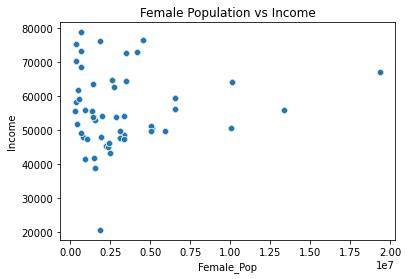

In [40]:
sns.scatterplot(data=us_census, x="Female_Pop", y="Income")
plt.title('Female Population vs Income')

In [125]:
#plt.scatter('Female_Pop', 'Income', data= us_census)

Text(0.5, 1.0, 'Male Population vs Income')

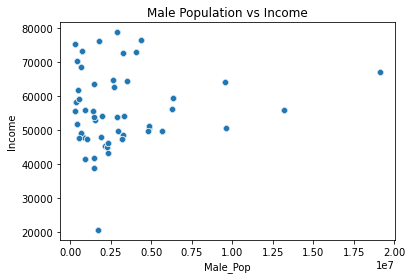

In [41]:
sns.scatterplot(data=us_census, x="Male_Pop", y="Income")
plt.title('Male Population vs Income')

In [121]:
#plt.scatter('Male_Pop', 'Income', data= us_census)

### Histograms of Races

In [42]:
us_census_Races = us_census['Races', 'Race_Percentage']

KeyError: ('Races', 'Race_Percentage')

In [43]:
us_census.value_counts()

State           Races     TotalPop  Income        Race_Percentage  Male_Pop  Female_Pop
Alabama         Asian     4830620   43296.358603  1.050255         2341093   2489527       1
North Carolina  Native    9845333   49937.464137  1.085491         4795408   5049925       1
North Dakota    Pacific   721640    58188.112195  0.000000         367963    353677        1
                Native    721640    58188.112195  5.651220         367963    353677        1
                Hispanic  721640    58188.112195  2.832683         367963    353677        1
                                                                                          ..
Kansas          White     2892987   53885.612648  75.958289        1439862   1453125       1
                Pacific   2892987   53885.612648  0.000000         1439862   1453125       1
                Native    2892987   53885.612648  0.733947         1439862   1453125       1
                Hispanic  2892987   53885.612648  11.644342        1439862 

In [44]:
us_census.head()

State     Races  TotalPop        Income  Race_Percentage  Male_Pop  \
0  Alabama     Asian   4830620  43296.358603         1.050255   2341093   
1  Alabama     Black   4830620  43296.358603        31.252976   2341093   
2  Alabama  Hispanic   4830620  43296.358603         3.751616   2341093   
3  Alabama    Native   4830620  43296.358603         0.453231   2341093   
4  Alabama   Pacific   4830620  43296.358603         0.034354   2341093   

   Female_Pop  
0     2489527  
1     2489527  
2     2489527  
3     2489527  
4     2489527

In [46]:
us_census_Races_pivot = us_census.pivot(columns= 'Races', index = 'State', values = 'Race_Percentage').reset_index()
us_census_Races_pivot

Races                 State      Asian      Black   Hispanic     Native  \
0                   Alabama   1.050255  31.252976   3.751616   0.453231   
1                    Alaska   5.450299   2.848503   5.909581  16.391018   
2                   Arizona   2.876579   3.850987  29.565921   4.355066   
3                  Arkansas   1.142336  18.968759   6.215474   0.522920   
4                California  13.052234   5.677396  37.291875   0.405292   
5                  Colorado   2.661997   3.546377  20.784380   0.573833   
6               Connecticut   4.021981  10.348068  15.604831   0.126208   
7                  Delaware   3.268692  20.743925   8.824766   0.259813   
8      District of Columbia   3.383240  51.776536   9.165922   0.200559   
9                   Florida   2.283174  15.165676  21.338543   0.210451   
10                  Georgia   3.097649  32.088298   8.418242   0.187583   
11                   Hawaii  36.592089   2.052848   9.186709   0.144937   
12                    Idaho   1.135906   0.566779  11.505369   1.468121   
13                 Illinois   4.475377  17.108411  15.601734   0.118427   
14                  Indiana   1.578272  11.186977   6.536744   0.194086   
15                     Iowa   1.699392   3.256987   5.303645   0.289793   
16                   Kansas   2.331053   6.567895  11.644342   0.733947   
17                 Kentucky   1.129847   8.272317   3.222994   0.166637   
18                Louisiana   1.669060  36.326241   4.866489   0.484309   
19                    Maine   0.965812   1.134473   1.431909   0.788319   
20                 Maryland   5.325414  30.677754   8.472498   0.203096   
21            Massachusetts   5.835656   6.833128  11.461066   0.128279   
22                 Michigan   2.423110  17.633103   4.634993   0.484411   
23                Minnesota   4.156072   5.659820   5.152924   1.069040   
24              Mississippi   0.876444  41.491945   2.842401   0.389970   
25                 Missouri   1.624496  14.122118   4.037248   0.363329   
26                  Montana   0.570370   0.429259   3.268889   7.060741   
27                 Nebraska   1.859023   4.956203   9.203759   0.864474   
28                   Nevada   7.095729   7.739617  27.100884   1.087187   
29            New Hampshire   2.191438   1.227740   3.321918   0.142808   
30               New Jersey   8.159990  14.387862  18.749500   0.115335   
31               New Mexico   1.234337   1.755020  45.282932   9.248594   
32                 New York   7.897159  15.668046  17.241425   0.321639   
33           North Carolina   2.317457  21.395117   8.464763   1.085491   
34             North Dakota   0.961951   1.284390   2.832683   5.651220   
35                     Ohio   1.621081  16.207276   3.672084   0.168888   
36                 Oklahoma   1.801148   8.314737  10.079904   6.716842   
37                   Oregon   3.594909   1.730788  11.441212   1.000242   
38             Pennsylvania   2.797751  11.633948   6.128014   0.119269   
39              Puerto Rico   0.075197   0.092559  98.893574   0.002818   
40             Rhode Island   3.247500   5.682917  13.356667   0.346250   
41           South Carolina   1.249176  28.750916   5.056685   0.292399   
42             South Dakota   1.019369   1.423874   3.239640   9.417568   
43                Tennessee   1.407283  18.283817   4.720027   0.226635   
44                    Texas   3.669696  11.650048  38.046738   0.261144   
45                     Utah   2.196068   1.017949  13.468376   1.081368   
46                  Vermont   1.238798   0.980874   1.609290   0.301639   
47                 Virginia   5.455242  20.175998   8.011016   0.212453   
48               Washington   7.022007   3.384429  11.140969   1.410727   
49            West Virginia   0.682438   3.662810   1.290909   0.152686   
50                Wisconsin   2.404239   8.195187   6.683333   0.953664   

Races   Pacific      White  
0      0.034354  61.878656  
1      1.058683  60.910180  
2      0.167

<AxesSubplot:xlabel='White', ylabel='Count'>

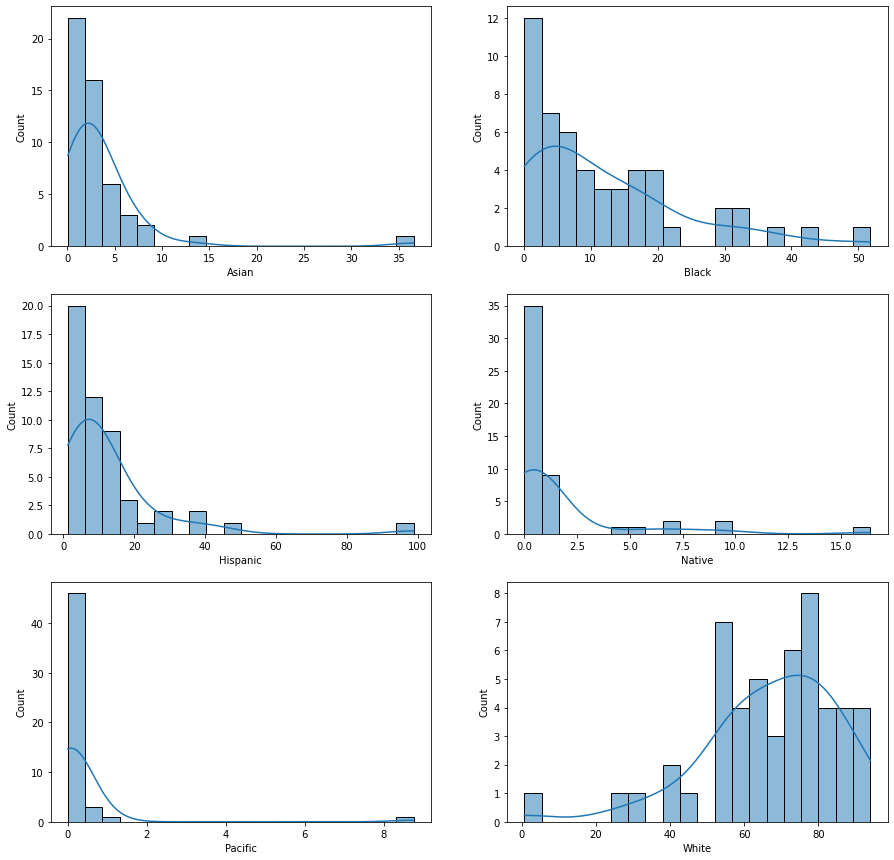

In [47]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(data=us_census_Races_pivot, x="Asian", kde=True, ax=axs[0, 0],bins =20)
sns.histplot(data=us_census_Races_pivot, x="Black", kde=True, ax=axs[0, 1],bins =20)
sns.histplot(data=us_census_Races_pivot, x="Hispanic", kde=True, ax=axs[1, 0],bins =20)
sns.histplot(data=us_census_Races_pivot, x="Native", kde=True, ax=axs[1, 1],bins =20 )
sns.histplot(data=us_census_Races_pivot, x="Pacific", kde=True, ax=axs[2, 0],bins=20)
sns.histplot(data=us_census_Races_pivot, x="White", kde=True, ax=axs[2, 1],bins=20)

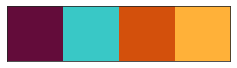

In [48]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


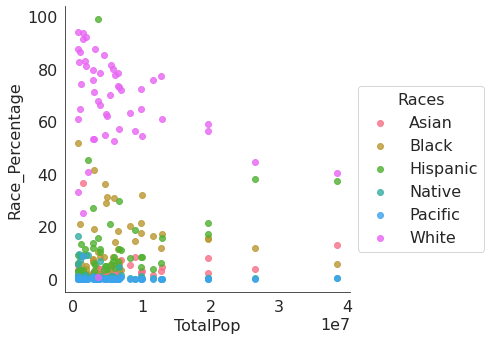

In [49]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=us_census, x='TotalPop', y='Race_Percentage', hue='Races', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Races", fancybox=True)
#change colors of labels
#for i, text in enumerate(leg.get_texts()):
#    plt.setp(text, color = customPalette[i])

In [50]:
us_census.head(50)

State     Races  TotalPop        Income  Race_Percentage  \
0                Alabama     Asian   4830620  43296.358603         1.050255   
1                Alabama     Black   4830620  43296.358603        31.252976   
2                Alabama  Hispanic   4830620  43296.358603         3.751616   
3                Alabama    Native   4830620  43296.358603         0.453231   
4                Alabama   Pacific   4830620  43296.358603         0.034354   
5                Alabama     White   4830620  43296.358603        61.878656   
6                 Alaska     Asian    733375  70354.743902         5.450299   
7                 Alaska     Black    733375  70354.743902         2.848503   
8                 Alaska  Hispanic    733375  70354.743902         5.909581   
9                 Alaska    Native    733375  70354.743902        16.391018   
10                Alaska   Pacific    733375  70354.743902         1.058683   
11                Alaska     White    733375  70354.743902        60.910180   
12               Arizona     Asian   6641928  54207.820955         2.876579   
13               Arizona     Black   6641928  54207.820955         3.850987   
14               Arizona  Hispanic   6641928  54207.820955        29.565921   
15               Arizona    Native   6641928  54207.820955         4.355066   
16               Arizona   Pacific   6641928  54207.820955         0.167632   
17               Arizona     White   6641928  54207.820955        57.120000   
18              Arkansas     Asian   2958208  41935.633968         1.142336   
19              Arkansas     Black   2958208  41935.633968        18.968759   
20              Arkansas  Hispanic   2958208  41935.633968         6.215474   
21              Arkansas    Native   2958208  41935.633968         0.522920   
22              Arkansas   Pacific   2958208  41935.633968         0.146861   
23              Arkansas     White   2958208  41935.633968        71.137810   
24            California     Asian  38421464  67264.782303        13.052234   
25            California     Black  38421464  67264.782303         5.677396   
26            California  Hispanic  38421464  67264.782303        37.291875   
27            California    Native  38421464  67264.782303         0.405292   
28            California   Pacific  38421464  67264.782303         0.351410   
29            California     White  38421464  67264.782303        40.215789   
30              Colorado     Asian   5278906  64657.801787         2.661997   
31              Colorado     Black   5278906  64657.801787         3.546377   
32              Colorado  Hispanic   5278906  64657.801787        20.784380   
33              Colorado    Native   5278906  64657.801787         0.573833   
34              Colorado   Pacific   5278906  64657.801787         0.000000   
35              Colorado     White   5278906  64657.801787        69.895572   
36           Connecticut     Asian   3593222  76146.560588         4.021981   
37           Connecticut     Black   3593222  76146.560588        10.348068   
38           Connecticut  Hispanic   3593222  76146.560588        15.604831   
39           Connecticut    Native   3593222  76146.560588         0.126208   
40           Connecticut   Pacific   3593222  76146.560588         0.018599   
41           Connecticut     White   3593222  76146.560588        67.677053   
42              Delaware     Asian    926454  61827.976636         3.268692   
43              Delaware     Black    926454  61827.976636        20.743925   
44              Delaware  Hispanic    926454  61827.976636         8.824766   
45              Delaware    Native    926454  61827.976636         0.259813   
46              Delaware   Pacific    926454  61827.976636         0.000000   
47              Delaware     White    926454  61827.976636        64.632710   
48  District of Columbia     Asian    647484  75466.363636         3.383240   
49  District of Columbia     Black    647484  75466.363636        51.

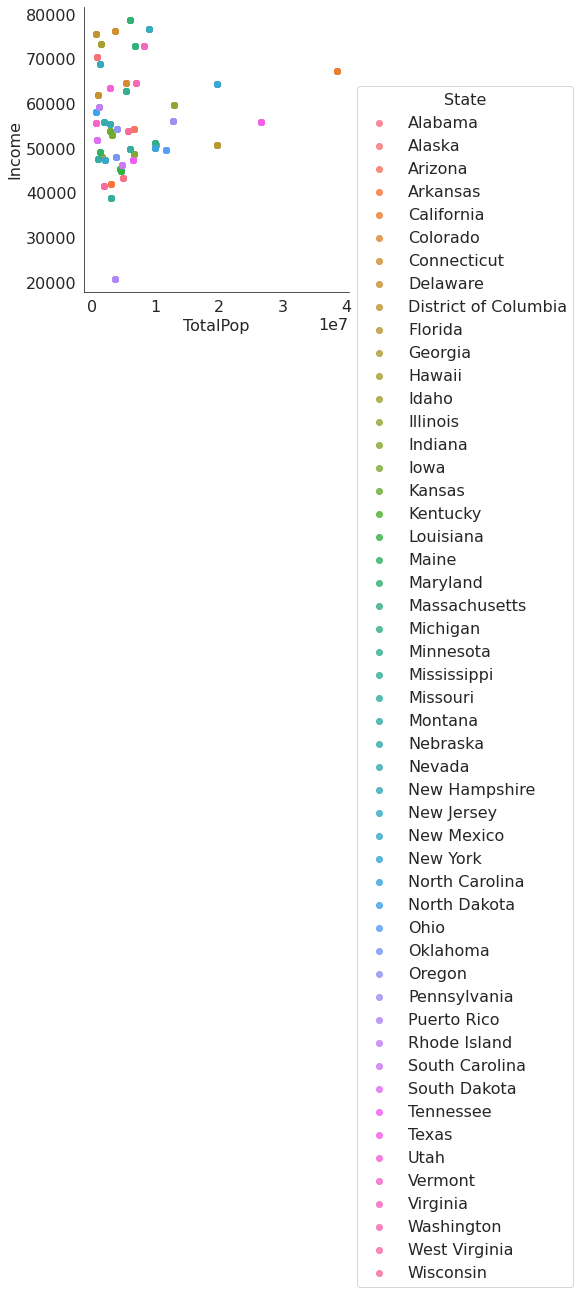

In [51]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=us_census, x='TotalPop', y='Income', hue='State', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="State", fancybox=True)
#change colors of labels
#for i, text in enumerate(leg.get_texts()):
#    plt.setp(text, color = customPalette[i])

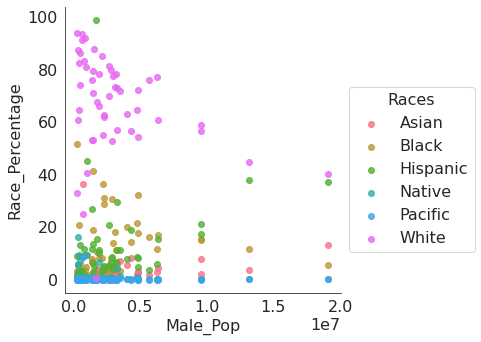

In [52]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=us_census, x='Male_Pop', y='Race_Percentage', hue='Races', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Races", fancybox=True)

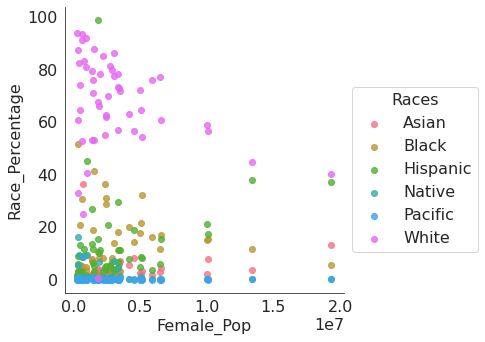

In [53]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=us_census, x='Female_Pop', y='Race_Percentage', hue='Races', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Races", fancybox=True)

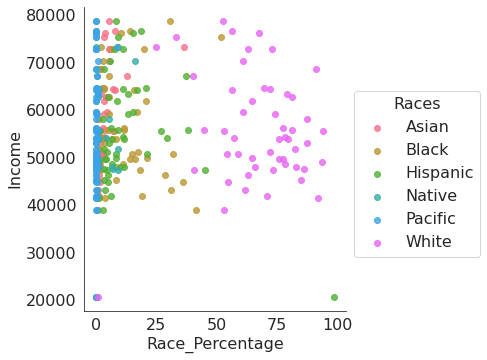

In [54]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=us_census, x='Race_Percentage', y='Income', hue='Races', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="Races", fancybox=True)

In [56]:
from geopy.geocoders import Nominatim
address='Maryland'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))

Maryland, United States
(39.5162234, -76.9382069)


In [57]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

In [62]:
#installation
#pip install folium

#for each coordinate, create circlemarker 
for i in range(len(us_census)):
    address=us_census.iloc[i]['State']
        #geolocator = Nominatim(user_agent="Your_Name"
    location = geolocator.geocode(address)
    lat = location.latitude
    long = location.longitude
    radius=5
    popup_text = """Race : {}<br>
                    Percentage : {}<br>"""
    popup_text = popup_text.format(us_census.iloc[i]['Races'],
                                   us_census.iloc[i]['Race_Percentage'] )
    folium.CircleMarker(location = [lat, long], radius=radius,popup= popup_text, fill =True).add_to(marker_cluster) #  
#show the map
world_map